

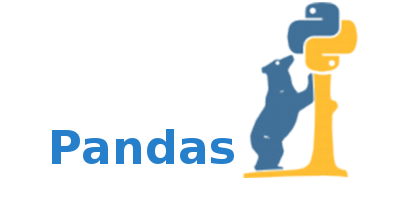

# Pandas

* Librería Pandas proporciona estructuras de datos de alto nivel que permiten representar series y tablas de datos, así como herramientas para un tratamiento de datos rápido y sencillo

* Además permite la visualización de información de forma sencilla

* Documentación [oficial](https://pandas.pydata.org/docs/)


## Objetivos de aprendizaje
- Verificar que usar métodos **Numpy** permite acelerar drásticamente ciertos cuellos de botella comunes de Pandas
- Mejor aplicar WHERE o SELECT en Numpy porque está optimizado en oneAPI
- Evitar **iterrows**, preferiblemente reescribiendo en Numpy
- Alcanzar mejor rendimiento al convertir columnas numéricas en arrays numpy


#### Please also see 

Es importante saber cómo acelerar Pandas de forma nativa a través de su dependencia de Numpy. **¡Pandas funciona con oneAPI a través de Numpy!*

Cuando surge la oportunidad, a menudo es mcycho más muy rentable aprovechar la codificación en forma "Numpy". Debido a la naturaleza del tamaño de muchos DataFrames, a menudo es mejor descubrir como operar invocando a Numpy que hacerlo iterativamente .

Hay una serie de excelentes referencias sobre la aceleración de Numpy o, más específicamente, Pandas que usan Numpy y lo animo a que revise estos recursos.


### Más info

Si quieres mejorar la eficiencia de los códigos desarrollados en Python te recomiendo la visualización de los siguientes vídeos:
* Charla de Nathan Cheever [1000x faster data manipulation: vectorizing with Pandas and Numpy](https://www.youtube.com/watch?v=nxWginnBklU&t=237s). ¡Su consejo es efectivo!
* Charla de Jake VanderPlas [Losing your Loops Fast Numerical Computing with NumPy](https://www.youtube.com/watch?v=EEUXKG97YRw)
* O consultar el libro Python [Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/). 


###  Estructuras de Datos
* Vectores de 1D: **Series** con  ```pd.Series```
* Arrays 2D..: **DataFrame** con ```pd.DataFrames```

### Series
Veamos un ejemplo de la creación de una "Serie" de con varios datos asociados de los *pasos* realizados a lo largo de varios días:

In [ ]:
import pandas as pd
step_data = [3620, 7891, 9761, 3907, 4338, 5373]
step_counts = pd.Series(step_data, name='steps')
step_counts.index = pd.date_range('20230629',periods=6)

print(step_counts)


* Se puede indexar los datos por su índice
    * Recordar que en python los índices comienzan en **cero** 


In [ ]:
# Just like a dictionary
print('Primera opción:', step_counts['2023-07-01'])

# Or by index position--like an array
print('Segunda opción:', step_counts[3])

# Select all of April
print(step_counts['2023-07'])

* Los datos inválidos pueden rellenarse fácilmente con valores
    *  La función ```fillna``` permite sustituir los valores NaN del ejemplo que previamiente hemos "rellenado" con valores *no válidos*

In [ ]:
import numpy as np

# Create invalid data
step_counts[1:3] = np.NaN

# Now fill it in with zeros
step_counts = step_counts.fillna(0.)

# equivalently,
# step_counts.fillna(0., inplace=True)

### DataFrames
* Los DataFrames pueden crearse desde listas, dictorionarios y series de pandas

In [ ]:
import pandas as pd

step_data = [3620, 7891, 9761, 3907, 4338, 5373]
step_counts = pd.Series(step_data, name='steps')

# Cycling distance
cycling_data = [10.7, 0, None, 2.4, 15.3, 10.9, 0, None]

# Create a tuple of data
joined_data = list(zip(step_data, cycling_data))

# The dataframe
activity_df = pd.DataFrame(joined_data)
print(activity_df)

* Podemos añadir etiquetas a las columnas para identificarlas


In [ ]:
# Add column names to dataframe
activity_df = pd.DataFrame(
	joined_data,
	index=pd.date_range('20230629', periods=6),
	columns=['Walking','Cycling'])
print(activity_df)

* Los *DataFrame* pueden indexarse por filas usando el método ```loc``` y ```iloc```

In [ ]:
# Select row of data by index name
print(activity_df.loc['2023-07-01'])

In [ ]:
# Select row of data by integer position
print(activity_df.iloc[-3])

* Los *DataFrame* pueden indexarse por columnas por **nombre**

In [ ]:
print(activity_df['Walking'])

* Los *DataFrame* pueden indexarse por columnas con un entero

In [ ]:
print(activity_df.iloc[:,0])

### Lectura desde ficheros
* Los ficheros tipo **CSV** pueden leerse con el comando ```read_csv```

In [ ]:
# The location of the data file
filepath = 'data/Iris_Data.csv'
# Import the data
data = pd.read_csv(filepath)
# Print a few rows
print(data.iloc[:5])

* Vamos a "re-asignar" una nueva columna a un DataFrame para ilustrar como se puede operar con **DataFrame**
    * En el ejemplo se añade una nueva columna con el contenido **"sepal_area"**
    * Y se imprimiran las cinco primeras filas, y las tres últimas columnas1

In [ ]:
data['sepal_area'] = data.sepal_length * data.sepal_width

# Print a few rows and columns
print(data.iloc[:5, -3:])

### Dibujar datos con pandas
* Elemento básico: **figura** 
   * La *figure* tiene varios paneles (o *Axes*), donde se representa el gráfico (o *plot*)
   * Se puede añadir el título (*title*) y etiquetas en el eje (*xlabel* e *ylabel*)
   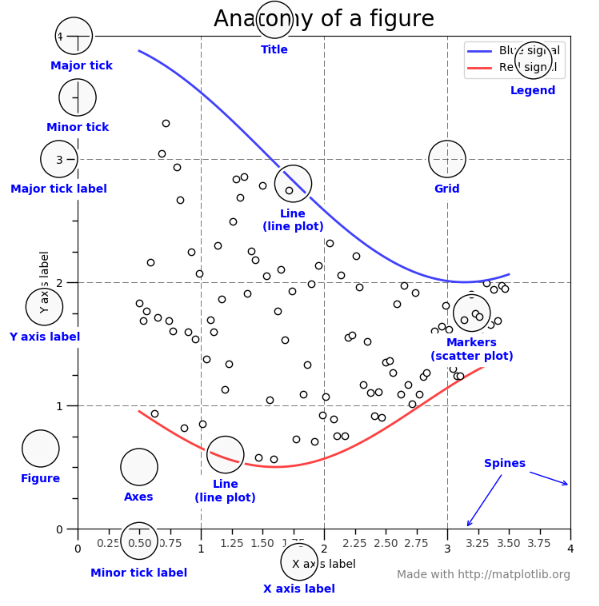

#### Matplotlib
* Podemos crear múltiples figuras y paneles pero, en cada momento, solo hay una figura y panel activos, en las que se dibujarán los gráficos
* Aunque existen multiples formas de trabajar, pero vamos a seguir el siguiente esquema:
1. Cargamos los datos (y los manipulamos, si es necesario)
2. Creamos una figura y los paneles que la componen (si es que hay más de uno)
3. Dibujamos los gráficos sobre los paneles que consideremos oportunos
4. Añadimos y modificamos los elementos adicionales que necesitemos

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Carga de datos
data = np.loadtxt('datasets/poblacion.txt')

# Extraemos los datos
years   = data[:,0]
hares   = data[:,1]
lynxes  = data[:,2]
carrots = data[:,3]

Text(0.5, 0.98, 'Poblacion de liebres')

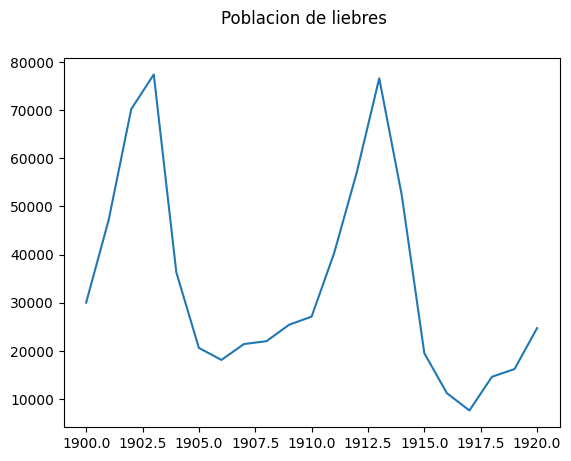

In [4]:
# Creamos una figura y los paneles (en este caso, solo una figura y un panel)
fig,ax = plt.subplots()

# Dibujamos los gráficos
ax.plot(years, hares)

# Añadimos y modificamos los elementos adicionales que necesitemos
fig.suptitle('Poblacion de liebres')

#### Comentarios del código
##### **fig,ax = plt.subplots()**
* Este método llamado sin parámetros crea una figura con un único panel.
   * La llamada devuelve la figura (**fig**) y el panel (**ax**) creados.
##### **ax.plot(years, hares)**
* Dibujamos en el panel con el método **plot**
   * Más adelante comentaremos esta función pero, de momento, hemos de indicarle cuáles son los valores del eje X (primer argumento) y cuáles los del eje Y (segundo argumento). 

#### **fig.suptitle('Poblacion de liebres')**
* Por último se modifican otros elementos como el título del panel (usando el método suptitle de la figura).

* Con **subplot** podemos crear varias subfiguras en una misma figura **subplot(numRows, numCols, plotNum)**
    * *numRows* = Número de filas
    * *numCols* = Número de columnas
    * *plotNum* = Número de gráfica

Text(0.5, 1.0, 'zanahorias')

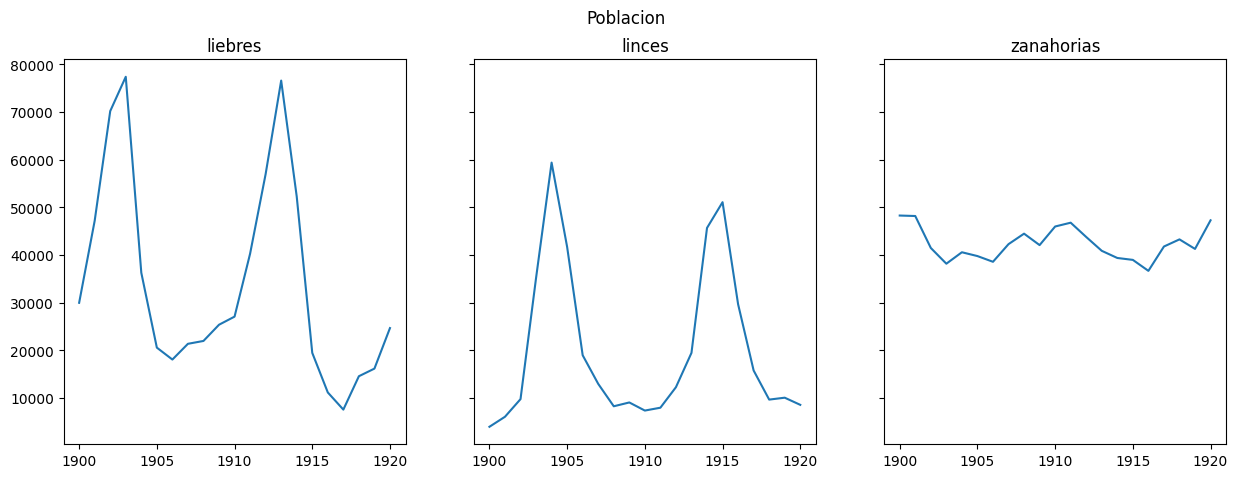

In [5]:
# Creamos una figura y los paneles (en este caso, solo una figura y un panel)
fig,[ax1, ax2, ax3] = plt.subplots(ncols=3, figsize=(15,5), sharey='row')

# Dibujamos los gráficos
ax1.plot(years, hares)
ax2.plot(years, lynxes)
ax3.plot(years, carrots)

# Añadimos y modificamos los elementos adicionales que necesitemos
fig.suptitle('Poblacion')
ax1.set_title("liebres")
ax2.set_title("linces")
ax3.set_title("zanahorias")

#### Otro tipo de figuras
* En [matplotlib](https://matplotlib.org/) tenemos varios tipos de figuras disponibles para poder visualizar información: barras, barras horizontales, apiladas... sectores, ect



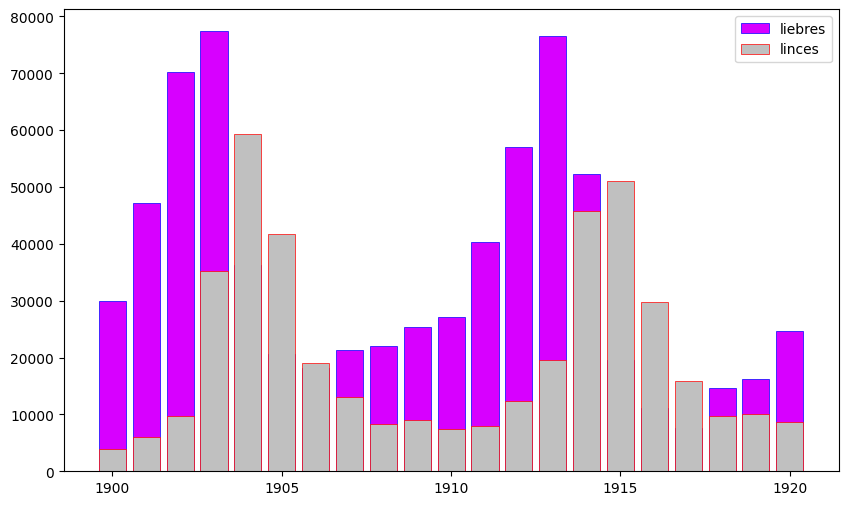

In [6]:
# Colores de las barras
haresColor = '#D700FF'
lynxesColor = '#C0C0C0'

# Creamos una figura y los paneles
fig,ax = plt.subplots(figsize=(10,6)) 

# Barras de liebres
ax.bar( years, hares, 
        align='center',
        linewidth=0.5,
        color=haresColor,
        edgecolor='b',
        label='liebres'
      )

# Barras de linces
ax.bar( years, lynxes, 
        align='center',
        linewidth=0.5,
        color=lynxesColor,
        edgecolor='r',
        label='linces'
      )

ax.legend(loc=1)

## Ejercicio: uso de una función con datos tipo DataFrame

Prepararemos un conjunto de datos con **DataFrame** y cronometraremos el tiempo que lleva aplicar las funciones de un usuario a todas las filas.

Veremos diferentes tiempos para aplicar nuestra función personalizada a todas las filas del conjunto de datos. Tener en cuenta que esto no tiene lógica condicional, solo estamos comparando el mismo conjunto de instrucciones una y otra vez para todos los elementos de datos en cada iteración del bucle.



In [7]:
import pandas as pd 
import numpy as np
import time

BIG = 100_000
df = pd.DataFrame(np.random.randint(0, 11, size=(BIG, 5)), columns=('a','b','c','d','e'))

In [8]:
def my_function(x):
    return np.log(1+x)

Muchas veces cuando estamos desarrollando, prestamos especial atención en que la aplicación desarrollado funcione correctamente sin considerar otros aspecto clave como son el rendimiento y tiempos de respuesta. Para ello solemos emplear casos de uso reducidos o "de juguete", pero este tipo de atajos se quedan muy por detrás de la curva de rendimiento.

Vamos a comprobar como cambia el rendimiento de una aplicación para mostrar las diferencias en los tiempos de ejecución cuando se aplican distintas estratégias de programación



### Primera aproximación: iterando sobre el dataframe o *df* empleando range

In [9]:
%%time
# naive loop method using pandas iloc
timing = {}
t1 = time.time()

for i in range(0,BIG):
    df.iloc[i,2] = my_function(df.iloc[i,0])
    
t2 = time.time()
timing['iloc'] = t2 - t1
df.head()

CPU times: user 9.61 s, sys: 0 ns, total: 9.61 s
Wall time: 9.64 s


,a,b,c,d,e
0,4,9,1.609438,2,8
1,4,2,1.609438,6,5
2,8,6,2.197225,8,1
3,10,8,2.397895,9,0
4,0,4,0.000000,8,6


* A continuación, vamos a tratar de buscar alguna sugerencia en la web

Tomemos como primera opción/consejo el uso de la función *iterrow* de Pandas

In [10]:
%%time
# naive loop method using pandas loc
import numpy as np
import time

# each iteration of the loop requires an interpretation of the instructions being used and this decoding takes time
t1 = time.time()

for index, row in df.iterrows():
    row[2] = my_function(row[0])
    
t2 = time.time()
baseTime = t2-t1
timing['iterrow'] = t2 - t1
df.head()

CPU times: user 7.68 s, sys: 10.9 ms, total: 7.7 s
Wall time: 7.69 s


,a,b,c,d,e
0,4,9,1.609438,2,8
1,4,2,1.609438,6,5
2,8,6,2.197225,8,1
3,10,8,2.397895,9,0
4,0,4,0.000000,8,6


Según esto se puede confirmar que, a veces, pandas *iloc* es un poco más rápido que *loc* si estás dispuesto a hacer un poco de indexación numérica.

Es posible que hayas visto otras opciones, tal vez algún video de Youtube que muestra cuánto más rápido es "at" con pandas

In [11]:
%%time
# naive loop method using pandas "at"
t1 = time.time()

for i in range(0,BIG):
    df.at[i,'c']=my_function(df.at[i,'a'])
    
t2 = time.time()
fastest_time = t2-t1
Speedup = baseTime / fastest_time
print("Speed up: {:4.0f} X".format(Speedup))
timing['df.at'] = t2 - t1
df.head()

Speed up:    1 X
CPU times: user 8.41 s, sys: 0 ns, total: 8.41 s
Wall time: 8.4 s


,a,b,c,d,e
0,4,9,1.609438,2,8
1,4,2,1.609438,6,5
2,8,6,2.197225,8,1
3,10,8,2.397895,9,0
4,0,4,0.000000,8,6


**Oh, porque no considerar otros niveles de paralelismo existentes en las CPUs modernas: ej SIMD** 

**¿Cómo puede Pandas explotarlos?**

Con la versión vectorizada, conocemos las instrucciones que se aplicarán y podemos aplicarlas en un conjunto de datos grande, sin bucle implícito, lo que significa que no tenemos que buscar y decodificar las instrucciones para cada iteración.

In [12]:
%%time
# vectorized method using pandas apply
t1 = time.time()

df['c'] = df['a'].apply(lambda x : my_function(x))

t2 = time.time()
fastest_time = t2-t1
Speedup = baseTime / fastest_time
timing['pandas apply'] = t2 - t1

print("Speed up: {:4.0f} X".format(Speedup))

Speed up:   54 X
CPU times: user 140 ms, sys: 3.58 ms, total: 143 ms
Wall time: 142 ms


### Dibujemos los resultados obtenidos

Speedup :   68 X


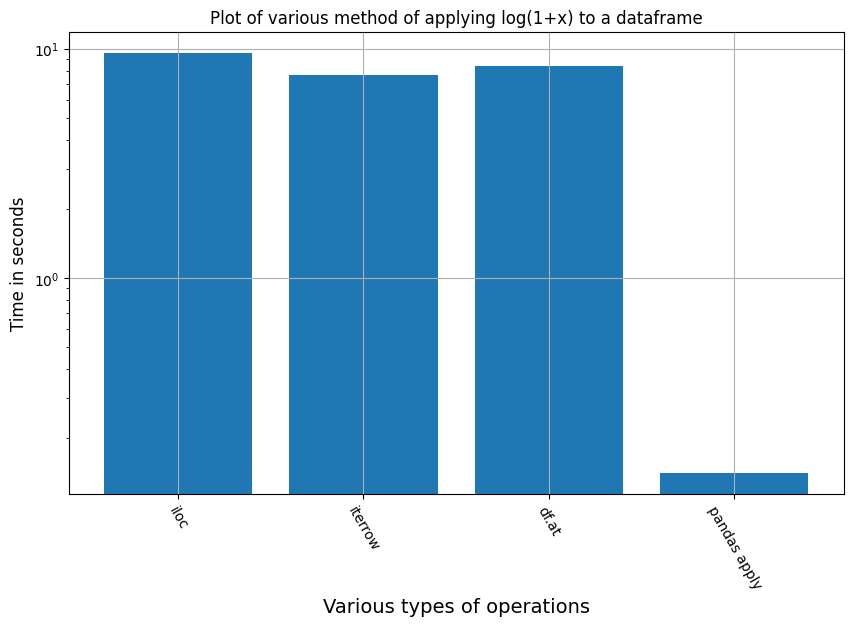

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Plot of various method of applying log(1+x) to a dataframe")
plt.ylabel("Time in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.yscale('log')
plt.xticks(rotation=-60)
plt.bar(x = range(len(timing)), height=timing.values(), align='center', tick_label=list(timing.keys()))
short = min(list(timing.values()))
long = max(list(timing.values()))
print('Speedup : {:4.0f} X'.format(long/short))

¡Acelerado varios decenas de veces veces!

**Pandas.apply** es el nuevo **mejor amigo!**

## Alternativa a Pandas para lógica condicion


Hmmm... Pero cuando nos encontramos con **Lógica condicional** en nuestra función, **¿sigue Pandas Apply** siendo nuestro **mejor amigo?**

Vamos a verlo con un ejemplo. A continuación, vamos a crear una matriz de valores generada aleatoriamente para incluirlos en un marco de datos de Pandas con una gran cantidad de filas


In [21]:
import pandas as pd 
import numpy as np
timing = {}
BIG = 4000000
df = pd.DataFrame(np.random.randint(0, 11, size=(BIG, 5)), columns=('a','b','c','d','e'))

En primer lugar, la librería de **Pandas** se basa en Numpy, y podemos demostrarlo observando un poco más en detalle los valores dentro de un DataFrame, comprobando que el uso de **numpy.ndarray** se encuentra en el tipo de datos

In [15]:
type(df['a'].values)

numpy.ndarray

Entonces, ¿cómo utilizar el **numpy integrado** de la mejor manera?

A continuación vamos a demostrarlo con un ejemplo: tenemos una función con varias fases donde se aplica mucha lógica condicional en conjunción con los DataFrame:


In [16]:
def func(a,b,c,d,e):
    if e == 10:
        return c*d
    elif (e < 10) and (e>=5):
        return c+d
    elif e < 5:
        return a+b

Al aplicar esta función al *DataFrame*, cada fila debe evaluarse para comprobar la condición y esto hace que el tiempo de ejecución sea lento porque la lógica condicional dificulta la vectorización de todo el conjunto de datos

### Solución sencilla: aplicar función *lambda* con filas de condición

In [25]:
import time
t1 = time.time()
df['new'] = df.apply(lambda x: func(x['a'], x['b'], x['c'], x['d'], x['e']), axis=1)
t2 = time.time()
print("time : {:5.2f}".format(t2-t1))
df.head()
timing['Pandas Apply'] = t2 - t1
baseTime = t2-t1

time : 60.10


Pero sigue siendo lento.... **¿Como ser capaces de explotar la vectorización?**

* Haremos uso de la capacidad de los pandas para **crear máscaras** que faciliten el uso de la vectorización; de esta manera, operamos en columnas enteras a la vez.

* La explotación de la vectorización **no es una teoría**
    * Grandes aceleraciones son posibles
    * Altamente recomendable utilizar librerías optimizadas en Intel oneAPI como **pandas**, **NumPy**, **SciPy** y otras


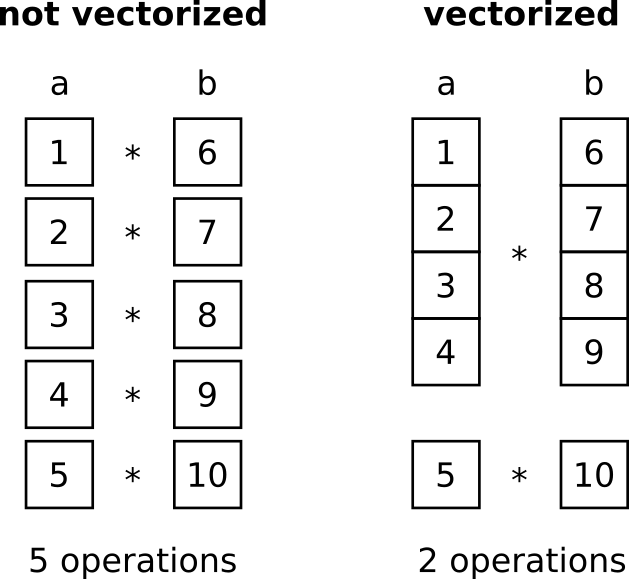

* Las operaciones escalares (no vectorizadas) no son eficientes
    * Como llevar un autobús con un pasajero en una ciudad
    * ... trata de llenarlo


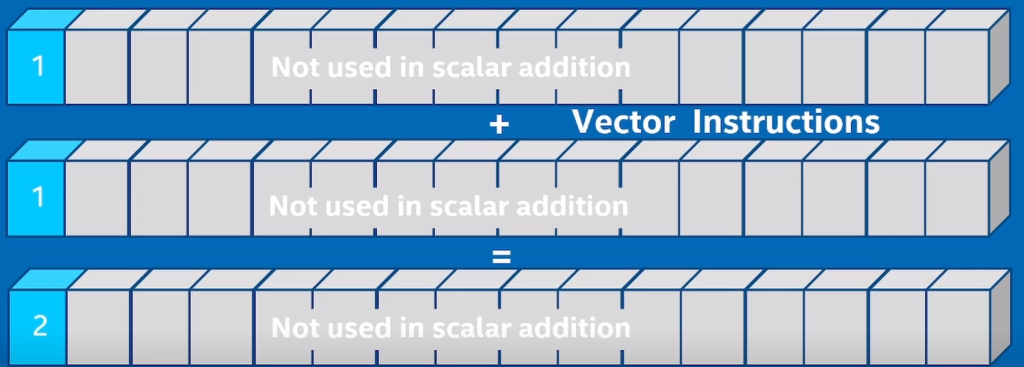

* Una vez creado un DataFrame, se puede filtrar por valores condicionales: **máscaras**
    * Copia con máscaras es vectorizado

In [22]:
import pandas as pd
import numpy as np

data = {"x": 2**np.arange(5),
    "y": 3**np.arange(5),
    "z": np.array([45, 98, 24, 11, 64])}

index = ["a", "b", "c", "d", "e"]

my_df = pd.DataFrame(data=data, index=index)

# Creating mask
mask = my_df["z"]<50

# Using mask
my_df["z"][mask]=0


* Volvamos al ejemplo anterior en el que se asignaban varias operaciones según ciertos valores

```
def func(a,b,c,d,e):
    if e == 10:
        return c*d
    elif (e < 10) and (e>=5):
        return c+d
    elif e < 5:
        return a+b
```

In [23]:
t1 = time.time()
df['new'] = df['c'] * df['d'] #default case e = =10
mask = (df['e'] < 10) & (df['e'] >= 5)
df.loc[mask,'new'] = df['c'] + df['d']
mask = df['e'] < 5
df.loc[mask,'new'] = df['a'] + df['b']
t2 = time.time()
print("time :", t2-t1)
df.head()
fastest_time = t2-t1
timing['Mask'] = t2 - t1
Speedup = baseTime / fastest_time
print("Speed up: {:4.0f} X".format(Speedup))

time : 0.3056521415710449
Speed up:  193 X


Speedup :  197 X


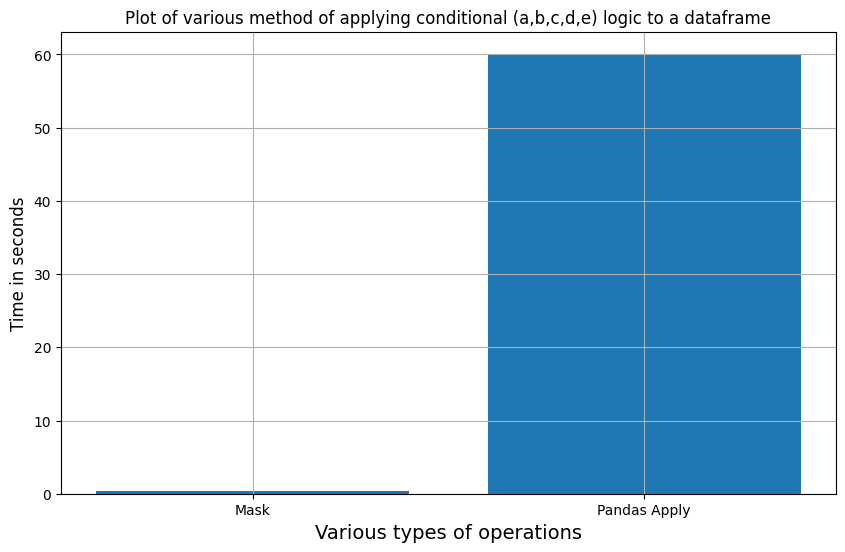

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Plot of various method of applying conditional (a,b,c,d,e) logic to a dataframe")
plt.ylabel("Time in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.bar(x = range(len(timing)), height=timing.values(), align='center', tick_label=list(timing.keys()))
short = min(list(timing.values()))
long = max(list(timing.values()))
print('Speedup : {:4.0f} X'.format(long/short))

Bueno, ¡eso está mucho mejor!

más de una aceleración de 100X en DevCloud

Pero el código parece complicado. El truco de enmascaramiento en matrices Numpy es efectivo pero un poco difícil de leer y depurar

### Más info
Si quieres mejorar la eficiencia de los códigos desarrollados en Python te recomiendo la visualización de los siguientes vídeos:
* Charla de Nathan Cheever [1000x faster data manipulation: vectorizing with Pandas and Numpy](https://www.youtube.com/watch?v=nxWginnBklU&t=237s). ¡Su consejo es efectivo!
* Charla de Jake VanderPlas [Losing your Loops Fast Numerical Computing with NumPy](https://www.youtube.com/watch?v=EEUXKG97YRw)
* O consultar el libro Python [Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/). 
